<img src="https://www.bpmfinancial.com/images/bpm/slide_01-man.jpg" width="550px" align="right">




# Markowitz vs. Black-Litterman Model: 2-Asset Allocation


Luc C. Smith

---




## Summary & Methods:


---

Markowitz's Modern Portfolio Theory became one of the great foundations of portfolio optimization and asset allocation. After it, extensions came along to enhance its ideas and cover some of the issues, giving way to such as the Black-Litterman model. These two are still consistently used throughout the financial sector for asset allocation, so a simple example is to be done comparing them with two assets only. The two assets will be Tesla and Coca-Cola's stocks, for one is extremely volatile with high returns while the other isn't so much, which will exemplify the models well. A simple minimum volatility optimization is to be done to exemplify Markowitz's Modern Portfolio Theory in contrast with Meucci's implementation of the Black-Litterman model with Idzorek's weight formula. The minimum volatility optimizer and the Black-Litterman model are done from scratch. 



## Markowitz's Modern Portfolio Theory:


---

American economist Harry Markowitz came up with the Modern Portfolio Theory in 1952, for which he was awarded a Nobel Prize. His theory emphasizes diversification and aims to find an optimized allocation of capital between assets. With this, this method constructs portfolios diversifying the allocation to maximize returns for certain levels of risk, creating an efficient frontier of portfolios with optimal weights for specific levels of risk and return. Risk is measured as volatility here, which is the standard deviation stemed from the variance of the returns of the portfolio's assets and the covariance between them. These ideas bring the key component of Markowitz's theory of diversification, for they aim to highlight how an asset shouldn't only be viewed individually but in how they affect the overall portfolio instead. When assets have inverse relationships in their price movements, the more they are able to diversify the portfolio since one isn't dependent on the other. Ultimatelly, Modern Portfolio Theory allows investors to construct more efficient portfolios. Even though there are a few variations of it, the simplest form is implemented here to minimize volatility only.
- **Minimize(volatility)** 
- **Volatility = square_root((w.T)(Cov)(w))**
  - *w.T: transpose of weights of assets.*
  - *Cov: covariance matrix showing correlation/relationship between assets.*
  - *w: weights of assets.*   

## The Black-Litterman Model:


---




Even though Markowitz's Modern Portfolio Theory became so prominent, it still has its issues. A few of them is that it can generate highly concentrated portfolios as some assets may have much bigger returns and volatility as well. With this, small changes in the returns measure also poses great sensitivity to the allocation, so huge weights can be attained towards one or two assets, which defeats the idea of diversification since the capital is not being spread out more. Furthermore, only returns and volatility are taken into consideration from a historical approach, and many investors may have their own opinions and ideas about assets and their future performances. As a result of these issues, extensions have been made to the method. Fischer Black and Robert Litterman created the Black-Litterman model at Goldman Sachs in 1990 to respond to these issues and give the ability for investors to use their views in the asset allocation method. This model begins with the market capitalization weights of assets as the portfolio and uses investor views on how they will perform in the future to optimize the return and risk metrics, producing new returns and a new covariance matrix to be used in the optimization part through the mean-variance objective function (Markowitz). Essentially, Black-Litterman adds the investor views to the Markowitz optimization function. Here, Meucci's implementation is to be used as he found more stable equations that are mathematically equal to the original ones. Here are the steps and equations for each part:
- **Step 1**: Market Cap. Weights: just retrieve market capitalization of assets and divide each by the total.
- **Step 2**: Estimate the initial covariance matrix (S) from the returns.
 - Here, simple Python "cov()" method is used.
- **Step 3**: Calculate the implied equilibrium excess returns (pi) to attain the market returns of the assets:
  - *pi = 2(A)(S)(market cap weights)*
  - *A: risk-aversion*
- **Step 4**: set the views vector (Q) for each investor view.
- **Step 5**: set the link matrix (P) to align the views to the specific assets.
  - This matrix has the number of views as the number of rows and columns being equal to the number of assets.
- **Step 6**: scalar tau, standardizer c, and the uncertainty of views matrix (omega):
  - *tau = 1 / length of time series*
  - *c = 1 as default* 
  - *omega = [ (P)(S)(P.T) ] / c*
- **Step 7**: Calculate the posterior/Black-Litterman returns (optimized returns):
  -  *post_returns = pi + (tau)(S)(P^T) x (tau)(P)(S)(P^T) + omega)^-1 x (Q - (P)(pi))*
- **Step 8**: Calculate the posterior/Black-Litterman covariance matrix (optimized matrix):
  -  *post_S = (1+tau)(S) - (tau^2)(S)(P.T) x ((tau)(P)(S)(P.T) + omega)^-1 x (P)(S)*
- **Step 9**: Make sure the posterior covariance is symmetric by summing it with its transpose and dividing by 2 and than making sure it is strictly positive semi-definite, which is needed for the optimization to work.
  - Here, a package is used to do this.
- **Step 10**: calculate the posterior weights:
  - *posterior_w = post_returns(A)(post_S)^-1*


## Tools of Implementation: Python


---



A prominent idea being tied to asset allocation is automation, so Python is a great tool for this being one of the most popular analytics and finance related programming languages. It contains many useful packages for these types of uses while also being free. Here, an algorithm is built to implement the two models described above with the following Python packages:
- **NumPy**: mathematical and vectorized tools (vector/matrix calculations).
- **Pandas**: data manipulation and tabular analytics.
- **Matplotlib**: visualization tools.
- **Pandas-datareader**: data gathering of stock prices.
- **cov_nearest**: statistical modelling tool to make sure posterior covariance is strictly positive semi-definite for optimization.

# Implementation:


---



- Before coding the implementation, the necessary packages named previously need to be imported:

In [1]:
#Necessary Packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from statsmodels.stats.correlation_tools import cov_nearest

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


- Now, the data can be gathered using pandas-datareader for more than 3 years. Only the closing prices are needed:

In [2]:
#Gather closing prices for TSLA and KO stocks:
stocks = ['TSLA', 'KO']
data = web.DataReader(stocks, start='2018-01-01', end='2021-10-27', data_source='stooq').Close
data.head()

Symbols,TSLA,KO
Date,,
2021-10-27,1037.86,55.52
2021-10-26,1018.43,54.47
2021-10-25,1024.86,54.23
2021-10-22,909.68,54.45
2021-10-21,894.00,54.35



- With this, the yearly return and the covariance matrix can now be calculated with simple Pandas functions:

In [3]:
#Calculate yearly returns and covariance matrix:
yearly_ret = data.resample('Y').last().pct_change().mean()  #Average yearly returns
cov = data.pct_change().cov()
print('Yearly Returns: \n' + str(yearly_ret))
print('\nCovariance Matrix:\n' + str(cov))

Yearly Returns: 
Symbols
TSLA    2.720705
KO      0.088992
dtype: float64

Covariance Matrix:
Symbols      TSLA        KO
Symbols                    
TSLA     0.001682  0.000128
KO       0.000128  0.000201


- Now, the minimum volatility portfolio can be found by simply looping through all possible weights between the two, which will be 100 different ones as the weights will start at 0 and end at 1. Here, a loop is done for this making Tesla's weight go from 0 to 1 by 0.01 increments and adding the weights, returns, and volatilities to empty lists, which then later get placed into a dictionary to be placed directly into a Pandas dataframe. Pandas dataframes have methods to easily find a specific row by a criterion, which here will be the minimum volatility. Matrices and vectors can easily be multiplied by NumPy's vectorized operations such as np.dot, so the variance can easily be calculated as such. 

In [4]:
#Empty lists to store weights, returns, and volatilities of portfolios made:
weights = []
returns = []
vols = []

tesla_w = 0   #TSLA initial weight

#Loop to calculate each portfolio with 100 different weights for TSLA:
for i in range(101):
  #Weights calculation:
  coke_w = 1 - tesla_w              #Find coke's weight given TSLA's
  w = np.array([tesla_w, coke_w])   #groups the two weights as one 
  weights.append(w)                 #Adds the two into list
  tesla_w += 0.01                   #Increase tesla weight each iteration by 0.01

  #Returns:
  ret = np.dot(w, yearly_ret)       #Weighted sum between returns and weights
  returns.append(ret)               #Add it to the list

  #Volatility:
  var = np.dot(w.T, np.dot(cov, w))        #w.T*Cov*w as shown previously
  yearly_vol = np.sqrt(var)*np.sqrt(252)   #Standard deviation is volatility
  vols.append(yearly_vol)

#Putting made lists into a dictionary:
port = {'Returns': returns, 'Volatility':vols}

#Placing weights into dictionary made with a list comprehension:
for counter, symbol in enumerate(data.columns.tolist()):
  port[symbol + '_Weight'] = [weight[counter] for weight in weights]

#Make a dataframe from the dictionary buil:
port_df = pd.DataFrame(port)
port_df.head()

,Returns,Volatility,TSLA_Weight,KO_Weight
0,0.088992,0.225079,0.00,1.00
1,0.115309,0.224347,0.01,0.99
2,0.141626,0.223796,0.02,0.98
3,0.167943,0.223427,0.03,0.97
4,0.194260,0.223241,0.04,0.96


- As it can be seen, as Tesla's weight increases, so does the returns. More interestingly, the volatility actually decreases first even though Tesla is much more volatile. This highlights Markowitz's Modern Portfolio Theory as it shows how placing all of the allocation into the least risky asset is actually not the least risky allocation, for diversification can actually reduce risk even more due to correlation differences among assets. Now, the minimum volatility portfolio can be found with Pandas and plotted against all of the other 99 portfolios made to see a visual representation:


In [5]:
# Minimum Volatility Portfolio:
min_vol = port_df.iloc[port_df.Volatility.idxmin()]
print('Min. Vol. Portfolio:\n' + str(min_vol))

Min. Vol. Portfolio:
Returns        0.220577
Volatility     0.223240
TSLA_Weight    0.050000
KO_Weight      0.950000
Name: 5, dtype: float64


- As seen, and as expected, the minimum volatility portfolio allocates the vast majority towards Coca-Cola's stock as it is less risky. Here is a visual representation using Matplotlib, where the minimum volatility portfolio is the yellow star:



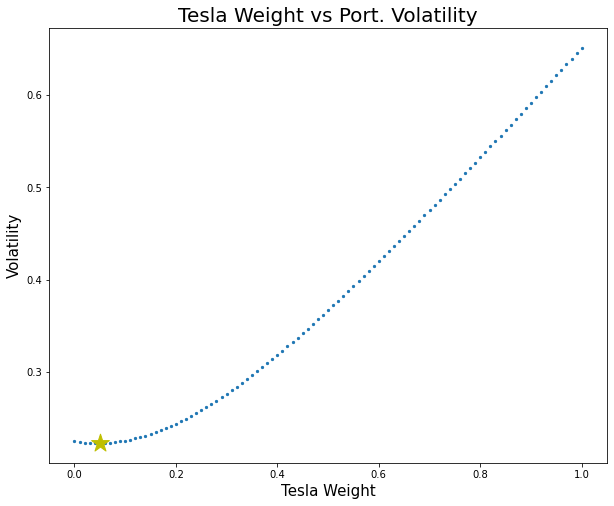

In [6]:
#Plot Tesla Weight vs. Volatility
plt.subplots(figsize=(10,8))
plt.title('Tesla Weight vs Port. Volatility', fontsize=20)
plt.xlabel('Tesla Weight', fontsize=15)
plt.ylabel('Volatility', fontsize=15)
plt.scatter(port_df.TSLA_Weight, port_df.Volatility, s=5)
plt.scatter(min_vol[2], min_vol[1], s=350, color = 'y', marker = '*')
plt.show()

- With the first method done, the Black-Litterman model can now be constructed and implemented. As stated, the market capitalization weights first need to be calculated. Pandas-datareader once again help in the data gathering:

In [7]:
#Market Cap. Weights:
mcs = web.get_quote_yahoo(stocks)['marketCap'].values    #Geta market caps of each as np array
mcs_w = mcs / mcs.sum()    #NumPy lets us do vectorized operation
mcs_w

array([0.77908741, 0.22091259])

- Now, the risk-aversion (A) parameter can be set (Meucci uses 1.2 as default) and the S can be set to equal the covariance matrix previously calculated:

In [8]:
#Risk-Aversion and Covariance Matrix (S):
A = 1.2
S = cov

- The next step is to calculate the implied equilibrium excess returns with the covariance, risk-aversion, and market cap. weights. Np.dot lets us do a dot product between vectors and matrices:


In [9]:
#Implied Equilibrium Excess Returns (pi):
    #pi = 2A*S*w
pi = 2.0*A*np.dot(S, mcs_w)   
pi

array([0.00321326, 0.00034518])

- There are only a few more needed variables for the model. Without an investor's views, this would just be the market portfolio as calculated with the market cap. weights, so a sample investor view is needed. Views can be either absolute such as "Tesla will go up by 10%" or relative such as "Tesla will outperform Coca-Cola by 10%." Relative views are more prominent among the industry, so this will be used here as the second example just named. The link matrix follows, with 1 as the asset with the positive view, Tesla, and -1 as the asset with the negative view, Coca-Cola. c, tau, and omega will also be done in the next cell with the respective Meucci formulas:

In [10]:
#Views (Q): Tesla will outperform coca cola by 10% 
Q = np.array([0.5])

#Link Matrix (P): 1 for positive viewed asset and -1 for negatively viewed asset
P = np.array([1, -1])

#Scalar (tau), c, and Uncertainty of views matrix (omega):
    #tau = 1 / length of time series 
    #c = 1 as default
    #omega = 1/c*P*S*P^T 
c = 1  
tau = 1/float(len(data))
omega = (1/c) * np.dot(np.dot(P, S), P.T) 
omega

0.0016281440954906779

- The Black-Litterman main formulas enhanced by Meucci can now be used to calculate the posterior returns and covariance matrix needed to be used in the formula for the weights' generation. The covariance matris can then be sumed with its transpose and divided by 2 to ensure it is symmetric to then use the statistical model cov_nearest to ensure it is strictly positive semi-definite, which is needed for some optimization tools to not receive errors:

In [11]:
#BL Excess Return:
    # = pi + tau*S*P^T * (tau*P*S*P^T + omega)^-1 * (Q - P*pi)
bl_returns = pi + (np.dot(tau*np.dot(S, P.T), 
             (tau*np.dot(np.dot(P, S), P.T) + omega)**-1) * (Q - np.dot(P, pi)))

#BL Covariance Matrix:
    # = (1+tau)*S - tau^2*S*P.T * (tau*P*S*P.T + omega)^-1 * P*S
bl_S = (1+tau)*S - np.dot(np.dot(tau**2*np.dot(S, P.T), 
        (np.dot(tau*np.dot(P, S), P.T) + omega)**-1), np.dot(P, S))

sym_S = (bl_S + bl_S.T) / 2      #Make it symmetric
semidef_S = cov_nearest(sym_S)   #Make it strict positive semi-definite

bl_returns, semidef_S

(array([0.0037057 , 0.00032192]), array([[0.00168406, 0.00012773],
        [0.00012773, 0.00020124]]))

- With all the components prepared, the weights can be generated with the formula named in Idzorek's paper, using the new returns and new covariance matrix:

In [14]:
#BL Posterior Weights:
    # w' = postRet * (A*postS)^-1
post_W = np.dot(bl_returns, np.linalg.inv(A*semidef_S))     
post_W = post_W / post_W.sum()   

#Printing BL Weights:
print('\nB-L Adjusted Portfolio Weights:')
print('Tesla: ' + str(round(post_W[0], 2)))
print('Coca-Cola: ' + str(round(post_W[1],2)))


B-L Adjusted Portfolio Weights:
Tesla: 0.91
Coca-Cola: 0.09


- Finally, a bar graph can be made to compare the two methods implemented here for a visual perspective. This can simply be done by placing both set of weights into a Pandas dataframe with the columns as the stock names and the index as the method used. Pandas dataframes have a plotting method connected to matplotlib:

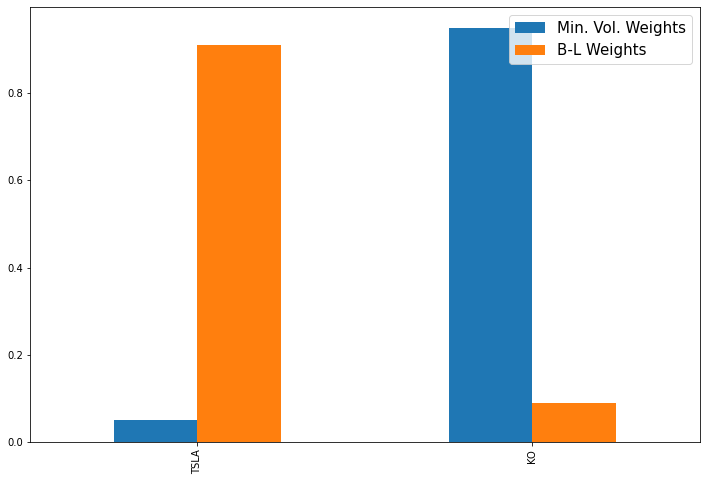

In [20]:
#Setting weights to respective lists:
mark_ws = [min_vol[2], min_vol[3]]
bl_ws = post_W

#Placing weights into dataframe:
frame = pd.DataFrame([mark_ws, bl_ws],
                     columns = stocks,
                     index = ['Min. Vol. Weights', 'B-L Weights'])

frame.T.plot(kind='bar', figsize=(12,8))  #Plotting the dataframe as a bar chart
plt.legend(fontsize=15)                   #Increasing legend fontsize

- With the above results, it can easily be seen how the weights changed with each method. It makes sense as well, for the first method aimed for the portfolio with the least amount of risk. Tesla is obviously the riskiest asset here out of the two by far, for it contains great amounts of volatility due to high price movements. However, in the Black-Litterman method, the investor's views are included. The views used favored Tesla's stock over Coca-cola's, meaning the investor saw higher potential for Tesla's stock over Coca-cola's. As seen, the Black-Litterman method resulted in Tesla having a much higher weight, being the opposite of the first method and making sense with the given information.

## Conclusion:


---


It is clear that the use of technological tools such as Python can be extremely helpful in implementing useful methods of asset allocation. These popular methods also prove to make sense towards their desired goals, for the weights generated followed the logic behind the information given. With this, it can easily be seen through this simple 2-asset example on how each one works and differs from the other. The Black-Litterman model surely provides greater flexibility and ability to include forward-looking returns according to an investor's opinion and even forecasting technique, which may prove to be of better use as returns don't necessarily follow historical data only.

# References:


---

- A STEP-BY-STEP GUIDE TO THE BLACK-LITTERMAN MODEL: Incorporating user-specified confidence levels (Thomas M. Idzorek - 2004)

- An Introduction to Modern Portfolio Theory: Markowitz, CAP-M, APT and Black-Litterman (Dr. Graeme West - 2004)

- The Black-Litterman Approach: Original Model and Extensions (Attilio Meucci - 2010)

